# minimal PyTorch autoencoder
- that encodes $[x^2, x, x/2]$ into $[x]$ and decodes it into $[x^2, x, x/2]$

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate training data (x in [0.1, 2])
x_train = torch.linspace(0.1, 2, 100).unsqueeze(1)
train_input = torch.cat([x_train**2, x_train, x_train/2], dim=1)
train_target = torch.cat([x_train**2, x_train, x_train/2], dim=1)

# Generate test data (x in [2.1, 3])
x_test = torch.linspace(2.1, 3, 20).unsqueeze(1)
test_input = torch.cat([x_test**2, x_test, x_test/2], dim=1)
test_target = torch.cat([x_test**2, x_test, x_test/2], dim=1)

In [2]:
# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 1)
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 3)
        )

    def forward(self, x): # type: ignore
        code = self.encoder(x)
        out = self.decoder(code)
        return out

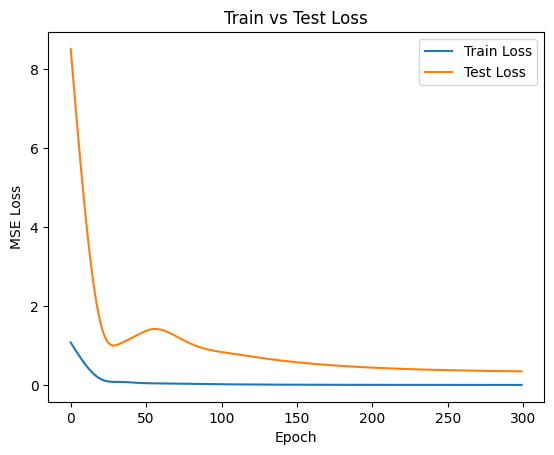

In [3]:
import matplotlib.pyplot as plt

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training with loss tracking
train_losses = []
test_losses = []

for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    output = model(train_input)
    loss = criterion(output, train_target)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_output = model(test_input)
        test_loss = criterion(test_output, test_target)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

# Plotting
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Train vs Test Loss")
plt.show()

In [4]:
# Test
test_x = torch.tensor([[1.5]])
test_input = torch.cat([test_x**2, test_x, test_x/2], dim=1)
predicted = model(test_input)
print("test_input:", test_input)
print("Predicted:", predicted)

test_input: tensor([[2.2500, 1.5000, 0.7500]])
Predicted: tensor([[2.2974, 1.4596, 0.7292]], grad_fn=<AddmmBackward0>)
